# Generate Rank-Rank Hypergeometric Overlap (RRHO) plots

In [1]:
library(RRHO)
library(dplyr)
library(lattice)

Loading required package: grid


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
get_deg_df <- function(sex, tissue){
    if(tolower(sex) == 'female'){
        fn = paste0("../../../", tolower(tissue),"/female_analysis/_m/genes/diffExpr_szVctl_full.txt")
    } else {
        fn = paste0("../../../", tolower(tissue),"/male_analysis/_m/genes/diffExpr_szVctl_full.txt")
    }
    if(tolower(tissue) == 'cmc_dlpfc'){
        df = data.table::fread(fn) %>% mutate(metric=-log10(P.Value)*sign(t), gencodeID=gene_id) %>% 
            select('gencodeID', 'metric')
    } else {
        df = data.table::fread(fn) %>% mutate(metric=-log10(P.Value)*sign(t)) %>% 
            select('gencodeID', 'metric')
    }
    return(df)
}


within_tissue_rrho_plot <- function(tissue){
    defaultW <- getOption("warn") 
    options(warn = -1) 
    f.list = get_deg_df('female', tolower(tissue)) %>% distinct(gencodeID, .keep_all = TRUE) 
    m.list = get_deg_df('male', tolower(tissue)) %>% distinct(gencodeID, .keep_all = TRUE) 
    rrho_df <- RRHO(f.list, m.list, BY=TRUE, labels=c("Female", "Male"), 
                    alternative='enrichment', log10.ind=TRUE)
    rrho_df$hypermat[is.na(rrho_df$hypermat)] <- 0 # for NA, correct to 0
    options(warn = defaultW)
    plt = levelplot(rrho_df$hypermat, col.regions=viridis::viridis(100), 
                    xlab="Female", ylab="Male", at=seq(0, 1000, 100))
    print(plt)
    label = paste("rrho_sex_compare", tolower(tissue), sep='_')
    R.devices::devEval(c("pdf", "png"), name=label, print(plt))
    #return(rrho_df)
}


## Within tissue comparison

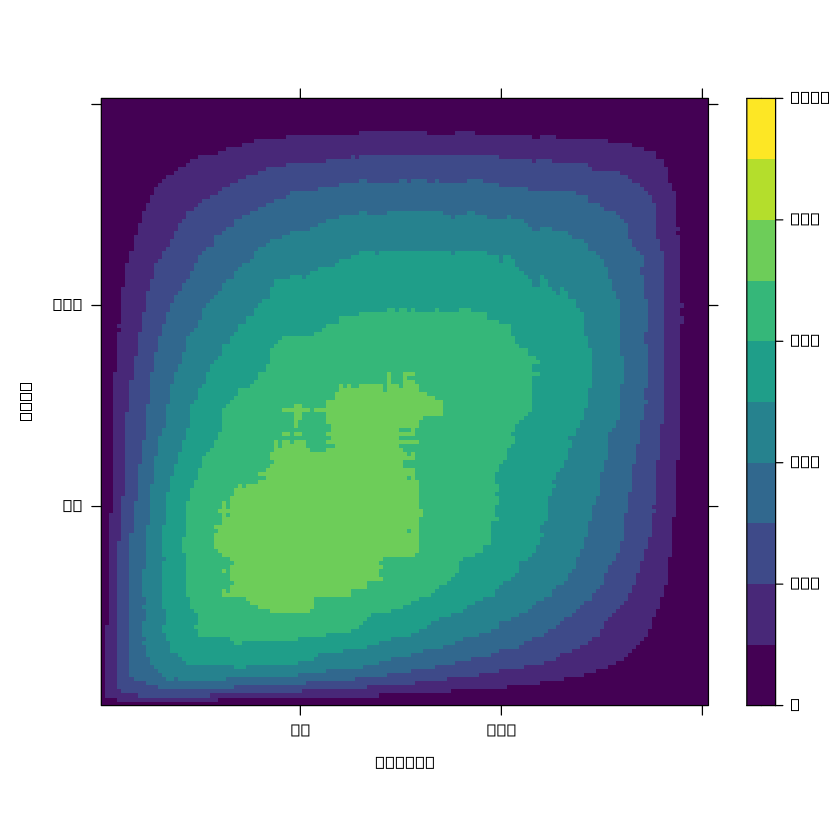

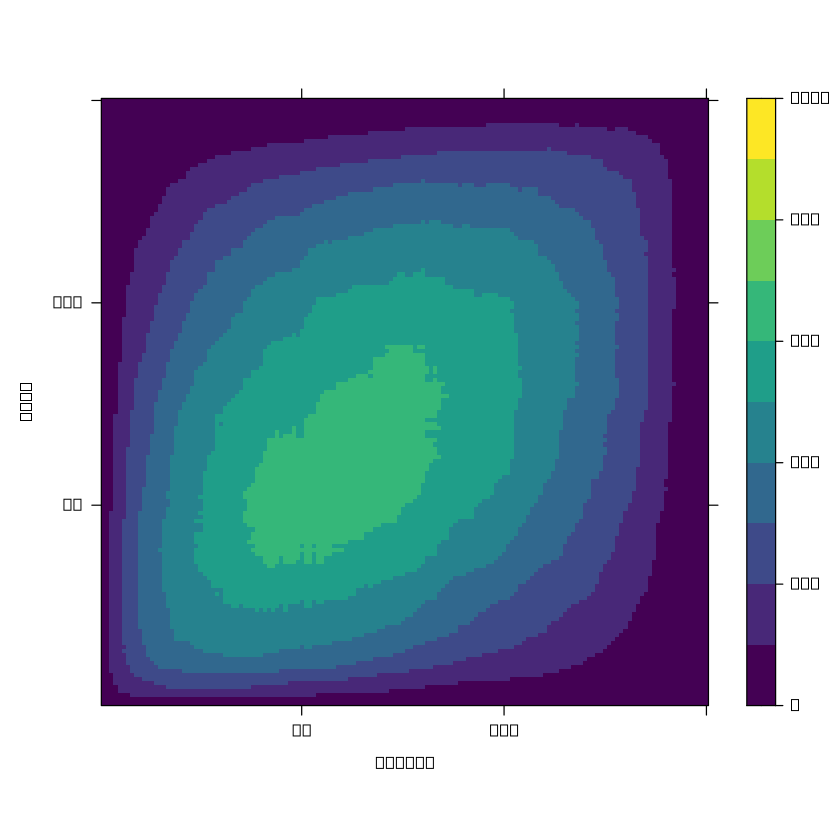

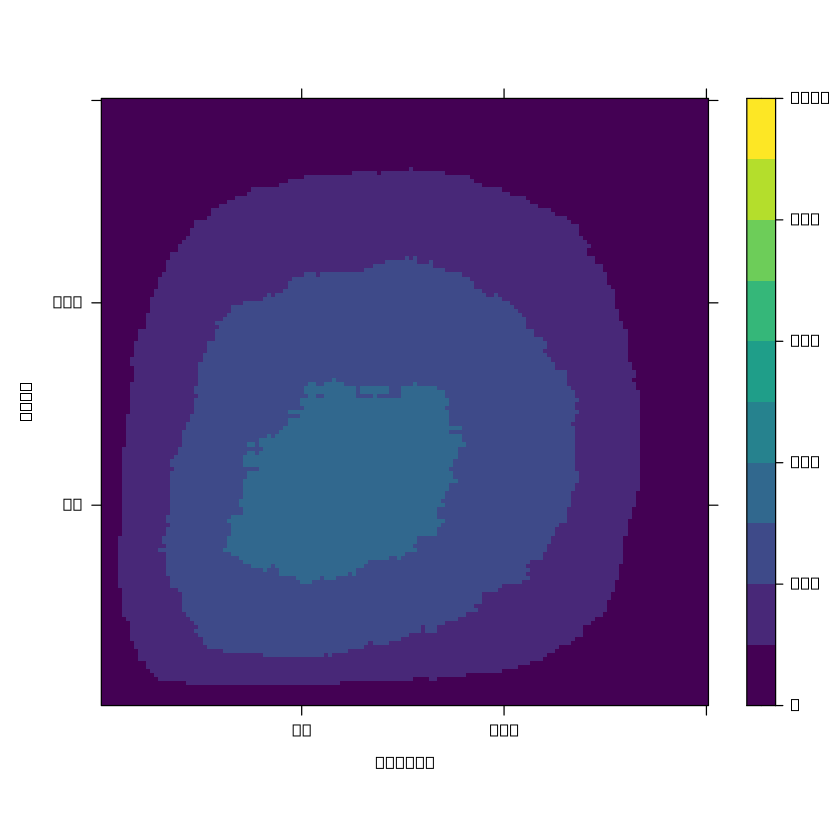

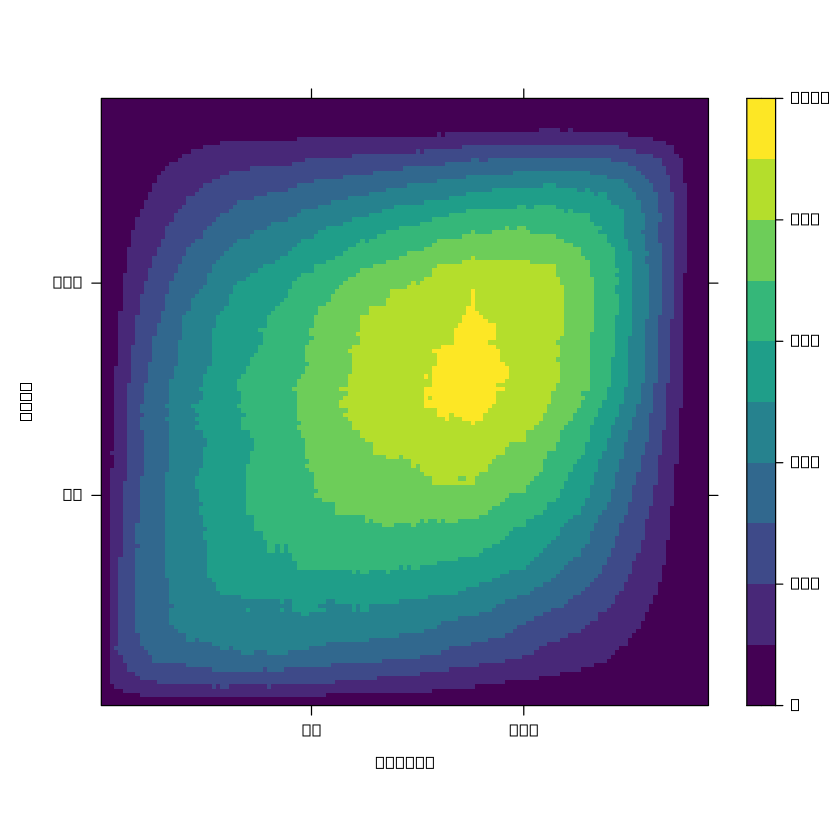

In [3]:
for(tissue in c('caudate', 'dlpfc', 'hippocampus', 'cmc_dlpfc')){
    within_tissue_rrho_plot(tissue)
}

## Female comparison across tissues

In [4]:
compare_tissue_plot <- function(sex, tissue1, tissue2){
    list1 = get_deg_df(sex, tissue1) %>% distinct(gencodeID, .keep_all = TRUE) 
    list2 = get_deg_df(sex, tissue2) %>% distinct(gencodeID, .keep_all = TRUE) 
    gene_overlap = intersect(list1$gencodeID, list2$gencodeID)
    list1 = list1 %>% filter(gencodeID %in% gene_overlap)
    list2 = list2 %>% filter(gencodeID %in% gene_overlap)
    rrho_df <- RRHO(list1, list2, BY=TRUE, labels=c(tissue1, tissue2), 
                   alternative='enrichment', log10.ind=TRUE)
    rrho_df$hypermat[is.na(rrho_df$hypermat)] <- 0 # for NA, correct to 0
    rrho_plot = levelplot(rrho_df$hypermat, col.regions=viridis::viridis, 
                          xlab=tissue1, ylab=tissue2, at=seq(0, 800, 100))
    R.devices::devEval(c("pdf", "png"), 
                       name=paste("rrho",sex,tissue1,tissue2, sep='_'), 
                       print(rrho_plot))
}

### Female

In [5]:
compare_tissue_plot("female", "Caudate", "DLPFC")
compare_tissue_plot("female", "Caudate", "Hippocampus")
compare_tissue_plot("female", "DLPFC", "Hippocampus")

$pdf
[1] "figures/rrho_female_Caudate_DLPFC.pdf"

$png
[1] "figures/rrho_female_Caudate_DLPFC.png"

$pdf
[1] "figures/rrho_female_Caudate_Hippocampus.pdf"

$png
[1] "figures/rrho_female_Caudate_Hippocampus.png"

$pdf
[1] "figures/rrho_female_DLPFC_Hippocampus.pdf"

$png
[1] "figures/rrho_female_DLPFC_Hippocampus.png"

In [6]:
compare_tissue_plot("female", "CMC_DLPFC", "Caudate")
compare_tissue_plot("female", "CMC_DLPFC", "DLPFC")
compare_tissue_plot("female", "CMC_DLPFC", "Hippocampus")

$pdf
[1] "figures/rrho_female_CMC_DLPFC_Caudate.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_Caudate.png"

$pdf
[1] "figures/rrho_female_CMC_DLPFC_DLPFC.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_DLPFC.png"

$pdf
[1] "figures/rrho_female_CMC_DLPFC_Hippocampus.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_Hippocampus.png"

### Male

In [7]:
compare_tissue_plot("male", "Caudate", "DLPFC")
compare_tissue_plot("male", "Caudate", "Hippocampus")
compare_tissue_plot("male", "DLPFC", "Hippocampus")

$pdf
[1] "figures/rrho_male_Caudate_DLPFC.pdf"

$png
[1] "figures/rrho_male_Caudate_DLPFC.png"

$pdf
[1] "figures/rrho_male_Caudate_Hippocampus.pdf"

$png
[1] "figures/rrho_male_Caudate_Hippocampus.png"

$pdf
[1] "figures/rrho_male_DLPFC_Hippocampus.pdf"

$png
[1] "figures/rrho_male_DLPFC_Hippocampus.png"

In [8]:
compare_tissue_plot("male", "CMC_DLPFC", "Caudate")
compare_tissue_plot("male", "CMC_DLPFC", "DLPFC")
compare_tissue_plot("male", "CMC_DLPFC", "Hippocampus")

$pdf
[1] "figures/rrho_male_CMC_DLPFC_Caudate.pdf"

$png
[1] "figures/rrho_male_CMC_DLPFC_Caudate.png"

$pdf
[1] "figures/rrho_male_CMC_DLPFC_DLPFC.pdf"

$png
[1] "figures/rrho_male_CMC_DLPFC_DLPFC.png"

$pdf
[1] "figures/rrho_male_CMC_DLPFC_Hippocampus.pdf"

$png
[1] "figures/rrho_male_CMC_DLPFC_Hippocampus.png"

## Repreducibility Information

In [9]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-11-24 10:26:38 EST"

    user   system  elapsed 
1001.511    3.407  992.448 

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
assertthat,assertthat,0.2.1,0.2.1,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/assertthat,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/assertthat,FALSE,FALSE,2019-03-21,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
base64enc,base64enc,0.1.3,0.1-3,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/base64enc,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
cli,cli,3.1.0,3.1.0,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/cli,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/cli,FALSE,FALSE,2021-10-27,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
colorspace,colorspace,2.0.2,2.0-2,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/colorspace,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/colorspace,FALSE,FALSE,2021-06-24,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
crayon,crayon,1.4.2,1.4.2,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/crayon,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/crayon,FALSE,FALSE,2021-10-29,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
data.table,data.table,1.14.2,1.14.2,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/data.table,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/data.table,FALSE,FALSE,2021-09-27,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
DBI,DBI,1.1.1,1.1.1,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/DBI,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/DBI,FALSE,FALSE,2021-01-15,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
digest,digest,0.6.28,0.6.28,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/digest,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/digest,FALSE,FALSE,2021-09-23,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
dplyr,dplyr,1.0.7,1.0.7,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/dplyr,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1/dplyr,TRUE,FALSE,2021-06-18,CRAN (R 4.1.2),NA,/home/jbenja13/R/x86_64-pc-linux-gnu-library/4.1
